## Asset Warranty and Purchase Date Analysis (Flag 18)

### Dataset Description
The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `alm_hardware` table with 500 entries. The assets alm_hardware table, consists of detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'role', 'email', 'start_date', and 'department', providing insights into the user profiles managed within the ServiceNow system.

### Your Task
**Goal**: To explore and understand the correlation between asset purchase dates, warranty periods, and employee start dates to optimize asset procurement and warranty management.

**Role**: Procurement Analyst

**Difficulty**: 3 out of 5. This analysis requires a detailed examination of temporal data and correlation patterns.

**Category**: Asset Management & User Management

## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the asset analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. This also checks the initial few rows to verify the correct loading of the data.

In [2]:
dataset_path = "csvs/flag-18.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()

,sys_updated_on,serial_number,purchased_on,asset_tag,warranty_expiration,assigned_to,department,cost,model_category,display_name,ci
0,2024-03-02 21:31:00,OYK-77215827,2024-02-29 21:31:00,P1000000,2026-11-19 21:31:00,Fannie Steese,Customer Support,4808,Computer,Dell Inspiron 15 Computer,Inspiron 15
1,2023-07-04 16:13:00,MOG-23425821,2023-06-30 16:13:00,P1000001,2024-10-21 16:13:00,Emilia Oxley,Customer Support,4799,Computer,Dell OptiPlex 980 Desktop Computer,OptiPlex 980
2,2023-10-22 06:03:00,OBU-72808441,2023-10-19 06:03:00,P1000002,2025-06-02 06:03:00,Darrel Tork,Customer Support,3303,Computer,Dell Inspiron 1525,Inspiron 1525
3,2023-12-28 05:06:00,JJA-59360711,2023-12-27 05:06:00,P1000003,2026-01-21 05:06:00,Jonathon Waldall,IT,1509,Computer,Dell Latitude 7410 Computer,Latitude 7410
4,2023-09-14 05:07:00,LBK-73947577,2023-09-11 05:07:00,P1000004,2024-12-04 05:07:00,Jarvis Galas,Customer Support,4938,Computer,Dell Inspiron N5010 Laptop,Inspiron N5010


### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [3]:
user_dataset_path = "csvs/flag-18-sysuser.csv"
data_user_human_agents = pd.read_csv(user_dataset_path)
data_user_human_agents.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email,start_date
0,02826bf03710200044e0bfc8bcbe5d55,NaN,Justina Dragaj,NaN,jimmie.barninger,Jimmie Barninger,"Carrera 54 No. 49 - 31, Medellin",Customer Support,NaN,jimmie.barninger@example.com,2023-12-17 03:12:00
1,02826bf03710200044e0bfc8bcbe5d5e,NaN,Lucius Bagnoli,NaN,melinda.carleton,Melinda Carleton,"3 Whitehall Court, London",Customer Support,NaN,melinda.carleton@example.com,2024-03-31 11:31:00
2,02826bf03710200044e0bfc8bcbe5d64,NaN,Lucius Bagnoli,NaN,jewel.agresta,Jewel Agresta,"3 Whitehall Court, London",Customer Support,NaN,jewel.agresta@example.com,2024-02-19 20:07:00
3,02826bf03710200044e0bfc8bcbe5d6d,NaN,Logan Muhl,NaN,sean.bonnet,Sean Bonnet,"8306 Mills Drive, Miami,FL",Customer Support,NaN,sean.bonnet@example.com,2023-09-08 11:58:00
4,02826bf03710200044e0bfc8bcbe5d76,NaN,Bridget Knightly,NaN,jacinto.gawron,Jacinto Gawron,"8306 Mills Drive, Miami,FL",Customer Support,NaN,jacinto.gawron@example.com,2023-10-31 16:37:00


### **Question 1: Is there a statistically significant correlation between the purchase date of assets and their warranty periods?**

#### Plot correlation between purchase date and warranty period
This visualization explores the relationship between the purchase dates of assets and the lengths of their warranty periods, measured in years. By plotting each asset's purchase date against its warranty duration, we aim to identify any trends or patterns that indicate a correlation, which could have an implications for asset management

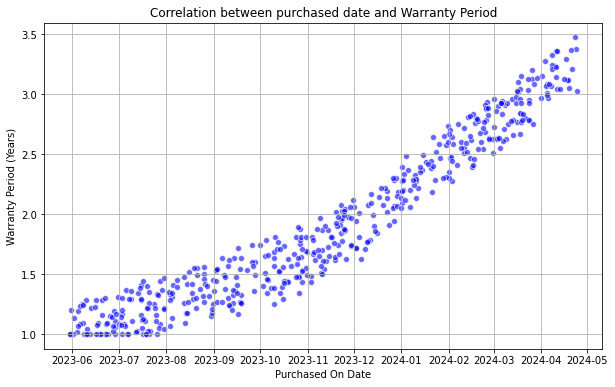

In [4]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing your data
df["warranty_expiration"] = pd.to_datetime(df["warranty_expiration"])
df["purchased_on"] = pd.to_datetime(df["purchased_on"])
# Calculate the warranty period in years
df['warranty_period_years'] = (df['warranty_expiration'] - df['purchased_on']).dt.days / 365

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['purchased_on'], df['warranty_period_years'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Correlation between purchased date and Warranty Period')
plt.xlabel('Purchased On Date')
plt.ylabel('Warranty Period (Years)')
plt.grid(True)



plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "correlative",
    "insight": "There is a positive correlation between Asset Purchase Dates and Warranty Periods",
    "insight_value": {
        "description": "Statistically significant. Recently purchased assets exhibit increasingly longer warranty periods compared to assets purchased earlier, indicating a trend towards extending warranties over time."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Purchase Date of Assets and Warranty Periods",
        "x_axis": {
            "name": "Purchase Date",
            "value": "Date range from earliest to most recent purchases",
            "description": "This axis represents the time of asset purchase, plotted chronologically."
        },
        "y_axis": {
            "name": "Warranty Period (years)",
            "value": "Continuously variable warranty durations",
            "description": "This axis displays the warranty periods associated with each purchase date, illustrating how newer purchases tend to have longer warranties."
        },
        "description": "The scatter plot demonstrates a clear positive trend, showing that as the purchase date of assets moves closer to the present, the associated warranty periods become longer. This trend is statistically significant and highlights a shift in procurement strategies, possibly reflecting improved product quality or changes in manufacturer warranty policies."
    },
    "question": "Is there a statistically significant correlation between the purchase date of assets and their warranty periods?",
    "actionable_insight": "This observed correlation should prompt a review of procurement policies to leverage the trend of longer warranties. Procurement strategies could be adjusted to optimize warranty terms, potentially leading to better coverage and reduced long-term maintenance costs. This insight could also guide future purchasing decisions, encouraging the selection of assets with favorable warranty terms that align with the organization's operational and financial planning."
}



{'data_type': 'correlative',
 'insight': 'There is a positive correlation between Asset Purchase Dates and Warranty Periods',
 'insight_value': {'description': 'Statistically significant. Recently purchased assets exhibit increasingly longer warranty periods compared to assets purchased earlier, indicating a trend towards extending warranties over time.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Purchase Date of Assets and Warranty Periods',
  'x_axis': {'name': 'Purchase Date',
   'value': 'Date range from earliest to most recent purchases',
   'description': 'This axis represents the time of asset purchase, plotted chronologically.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis displays the warranty periods associated with each purchase date, illustrating how newer purchases tend to have longer warranties.'},
  'description': 'The scatter plot demonstrates a clear positi

### **Question 2: Is it a linear trend and can it be  regressed with noise?**


#### Plot regression analysis, trend in warranty period over purchase dates
This plot extends the previous analysis by not only displaying the scatter of warranty periods against their respective purchase dates but also incorporating a linear regression model to determine if there is a discernible linear trend

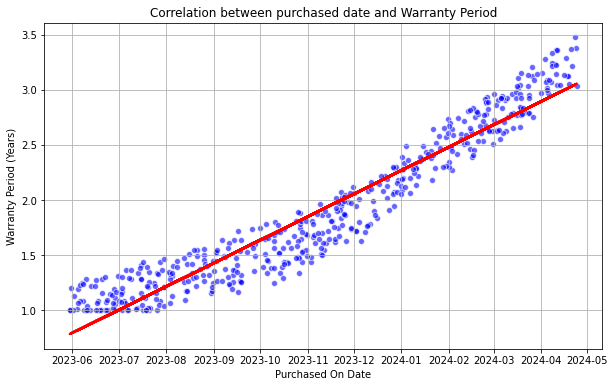

In [6]:
# Assuming 'df' is the DataFrame containing your data
df["warranty_expiration"] = pd.to_datetime(df["warranty_expiration"])
df["purchased_on"] = pd.to_datetime(df["purchased_on"])
# Calculate the warranty period in years
df['warranty_period_years'] = (df['warranty_expiration'] - df['purchased_on']).dt.days / 365

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['purchased_on'], df['warranty_period_years'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Correlation between purchased date and Warranty Period')
plt.xlabel('Purchased On Date')
plt.ylabel('Warranty Period (Years)')
plt.grid(True)
# Optionally, you can fit a linear regression line to emphasize the trend
# Using numpy for linear regression line
import numpy as np
# Convert dates to ordinal for regression
df['sys_updated_on_ordinal'] = df['purchased_on'].apply(lambda x: x.toordinal())
# Fit the regression
fit = np.polyfit(df['sys_updated_on_ordinal'], df['warranty_period_years'], 1)
fit_fn = np.poly1d(fit)
# Plot the regression line
plt.plot(df['purchased_on'], fit_fn(df['sys_updated_on_ordinal']), color='red', linewidth=2)

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "predictive",
    "insight": "The Linear Regression Model is able to predicts Warranty Periods Based on Purchase Dates",
    "insight_value": {
        "description": "The linear regression analysis confirms a predictable relationship between asset purchase dates and warranty periods, with a trend indicating longer warranties for more recently purchased assets."
    },
    "plot": {
        "plot_type": "regression",
        "title": "Linear Regression of Warranty Periods Against Purchase Dates",
        "x_axis": {
            "name": "Purchase Date",
            "value": "Date range from earliest to most recent purchases",
            "description": "This axis represents the chronological order of asset purchases."
        },
        "y_axis": {
            "name": "Warranty Period (years)",
            "value": "Continuously variable warranty durations",
            "description": "This axis plots the warranty periods, with the regression line illustrating the linear trend."
        },
        "description": "The regression plot effectively shows a clear linear trend, indicating that newer assets tend to have longer warranties. The presence of noise suggests variability around the trend line, which could be due to factors such as different asset types or supplier agreements."
    },
    "question": "Is it a linear trend and can it be regressed with noise?",
    "actionable_insight": "Given the predictability of warranty periods based on purchase dates as evidenced by the linear regression model, the organization can anticipate warranty terms for future purchases. This foresight could be instrumental in negotiating terms with suppliers or choosing products that offer the best value in terms of warranty coverage. Further, by understanding the variability (noise) around the trend, procurement managers can refine their asset management strategies to account for exceptions and ensure robust handling of warranty terms."
}


{'data_type': 'predictive',
 'insight': 'The Linear Regression Model is able to predicts Warranty Periods Based on Purchase Dates',
 'insight_value': {'description': 'The linear regression analysis confirms a predictable relationship between asset purchase dates and warranty periods, with a trend indicating longer warranties for more recently purchased assets.'},
 'plot': {'plot_type': 'regression',
  'title': 'Linear Regression of Warranty Periods Against Purchase Dates',
  'x_axis': {'name': 'Purchase Date',
   'value': 'Date range from earliest to most recent purchases',
   'description': 'This axis represents the chronological order of asset purchases.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis plots the warranty periods, with the regression line illustrating the linear trend.'},
  'description': 'The regression plot effectively shows a clear linear trend, indicating that newer assets tend 

### **Question 3: How does the asset purchase timing correlate with the start dates of recently joined employees?**

#### Plot correlation between asset updates and employee start dates
This visualization explores the relationship between the most recent update dates of assets and the start dates of employees assigned to these assets. By examining the alignment between asset updates and new hires, we can assess how effectively new resources are provisioned in relation to employee onboarding:

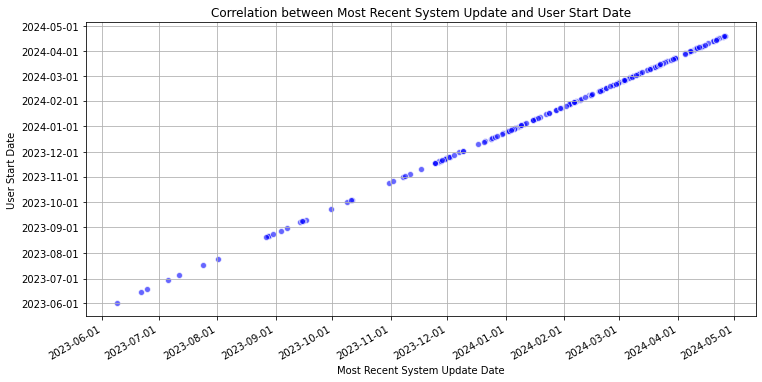

In [8]:
most_recent_updates = flag_data.groupby('assigned_to')['sys_updated_on'].max().reset_index()

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates  # for date formatting
# Assuming most_recent_updates is already defined as shown previously
# It contains 'assigned_to' and the most recent 'sys_updated_on'

# Merge most_recent_updates with data_user_human_agents to get start_dates aligned with sys_updated_on dates
visualization_data = pd.merge(most_recent_updates, data_user_human_agents[['name', 'start_date']], 
                             left_on='assigned_to', right_on='name', how='left')

# Drop any rows with NaN values that might affect the visualization
visualization_data.dropna(subset=['start_date', 'sys_updated_on'], inplace=True)

# Convert dates to ordinal for plotting purposes
visualization_data["sys_updated_on"] = pd.to_datetime(visualization_data["sys_updated_on"])
visualization_data["start_date"] = pd.to_datetime(visualization_data["start_date"])
visualization_data['sys_updated_on_ordinal'] = visualization_data['sys_updated_on'].apply(lambda x: x.toordinal())
visualization_data['start_date_ordinal'] = visualization_data['start_date'].apply(lambda x: x.toordinal())


# Create the scatter plot using datetime directly
plt.figure(figsize=(12, 6))
plt.scatter(visualization_data['sys_updated_on'], visualization_data['start_date'], alpha=0.6, edgecolors='w', color='blue')
plt.title('Correlation between Most Recent System Update and User Start Date')
plt.xlabel('Most Recent System Update Date')
plt.ylabel('User Start Date')

# Format the date display on the x and y axes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set the date tick labels on the x-axis to be rotated for better readability
plt.gcf().autofmt_xdate()  # Automatically format x-axis dates to fit them better

# Optionally rotate y-axis labels manually if needed (uncomment the next line if desired)
# plt.gca().set_yticklabels(plt.gca().get_yticks(), rotation=45)

plt.grid(True)  # Add a grid for easier visual estimation

plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "correlative",
    "insight": "There is a strong positive correlation between employee Start Dates and Asset Purchase dates",
    "insight_value": {
        "description": "Assets are frequently purchased close to the start dates of new employees, indicating that recent hires are likely to receive newer assets with potentially longer warranties."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Start Dates of New Employees and Asset Purchase Dates",
        "x_axis": {
            "name": "Employee Start Date",
            "value": "Dates ranging from earliest to most recent employee inductions",
            "description": "This axis represents the start dates of employees within the organization."
        },
        "y_axis": {
            "name": "Asset Purchase Date",
            "value": "Dates of asset purchases assigned to new employees",
            "description": "This axis plots the purchase dates of assets, showing how these dates align with employee start dates."
        },
        "description": "The scatter plot demonstrates a clear positive correlation, indicating that newer employees are typically assigned newly purchased assets. This trend suggests a strategic approach to asset procurement that aligns with workforce expansion."
    },
    "question": "How does the asset purchase timing correlate with the start dates of recently joined employees?",
    "actionable_insight": "This correlation suggests that recently joined employees receive newer assets, which not only could enhance their initial experience and productivity but also align with organizational strategies to maintain up-to-date technology and infrastructure. This trend should encourage HR and IT departments to collaborate closely on workforce and asset planning, ensuring that asset procurements are timely and anticipate the needs of incoming staff. Additionally, this practice might also imply a need for systematic updates or replacements of older assets to maintain parity and prevent technological disparities among staff."
}


{'data_type': 'correlative',
 'insight': 'There is a strong positive correlation between employee Start Dates and Asset Purchase dates',
 'insight_value': {'description': 'Assets are frequently purchased close to the start dates of new employees, indicating that recent hires are likely to receive newer assets with potentially longer warranties.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Start Dates of New Employees and Asset Purchase Dates',
  'x_axis': {'name': 'Employee Start Date',
   'value': 'Dates ranging from earliest to most recent employee inductions',
   'description': 'This axis represents the start dates of employees within the organization.'},
  'y_axis': {'name': 'Asset Purchase Date',
   'value': 'Dates of asset purchases assigned to new employees',
   'description': 'This axis plots the purchase dates of assets, showing how these dates align with employee start dates.'},
  'description': 'The scatter plot demonstrates a clear positive correlati

Question 4: What are the long-term effects of current asset assignment practices on employee performance and asset utilization?

"Objective": "The goal of this question is to predict the impact of current asset assignment practices on overall employee productivity and to prescribe changes to improve both asset utilization and employee satisfaction over time.",
"actionable_insight": "The findings from this analysis could lead to the development of a dynamic asset management system that not only aligns asset purchases with new hires but also schedules upgrades and rotations based on asset performance data and employee needs. This system could ensure that all employees, not just new hires, have access to the best possible tools at the right time, enhancing overall operational efficiency and employee satisfaction."

### Summary of Findings (Flag 18):

1. **Correlation Exploration**: This dataset involves exploring the correlation between the warranty periods of assets and their purchase dates across different categories. The analysis also delves into how these factors align with the start dates of employees who are assigned these assets.
   
2. **Insight into Asset Management**: The dataset is crucial for understanding asset procurement strategies over time, particularly how warranty durations are structured relative to asset purchase dates. This is particularly relevant for optimizing lifecycle management and cost efficiency in asset procurement.
   
3. **Employee Integration**: By examining the relationship between asset allocation and employee start dates, the dataset provides insights into how new hires are equipped with necessary tools and resources, ensuring they are well-prepared from day one.